In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import sys
sys.path.append("../")

### Import Desired Tires

In [7]:
all_tires = {
    "Hoosier_16x7.5-10_R20_7_cornering":{"long":None, "lat":None},
    "Hoosier_18x6.0-10_R20_7_cornering":{"long":None, "lat":None},
}

### Filter Data

In [8]:
camber = 0 # default camber
pressure = 12 * 6.89476 # default pressure
velocity = 25 * 1.60934 # default velocity
slip_angle = 0
tire_scaling = 2/3

tire_dict = all_tires.items()

for name, tire in tire_dict:
    try:
        df = pd.read_csv(f"../../processing/results/{name}.csv")
        tire["long"] = df[(df["pressure"] == pressure) & (df["velocity"] == velocity) & (df["camber"] == camber) & (df["slip"] == slip_angle)]
    except:
        print("Error getting long data for {0}".format(name))

    try:
        df = pd.read_csv(f"../../processing/results/{name}.csv")
        tire["lat"] = df[((df["velocity"] == velocity) & (df["pressure"] == pressure))]
    except:
        print("Error getting lateral data for {0}".format(name))

### Plot FY vs SA at Different IA

In [9]:
names = []
normal_load_lst = []
FY_diffs_lst = []

for name, tire in all_tires.items():
    normal_loads = sorted(np.array(tire["lat"]["load"].unique()))
    IA_lst = tire["lat"]["camber"].unique()
    normal_load_temp = []
    peak_FY_temp = []
    for load in normal_loads:
        # plt.figure()
        peak_FY = []
        for IA in IA_lst:
            temp = tire["lat"][(tire["lat"]["load"] == load) & (tire["lat"]["camber"] == IA)]

            peak_FY.append(max(temp["FY"]))

            # plt.plot(temp["SA"], temp["FY"])

        # print(peak_FY)
        peak_FY_temp.append(max(peak_FY) - min(peak_FY))
        normal_load_temp.append(load)

        # plt.title(f"FY vs SA at FZ = {round(load)} N")
        # plt.xlabel("SA (deg)")
        # plt.ylabel("FY (N)")
        # plt.legend(IA_lst)

    normal_load_lst.append(normal_load_temp)
    FY_diffs_lst.append(peak_FY_temp)
    names.append(name[:23])

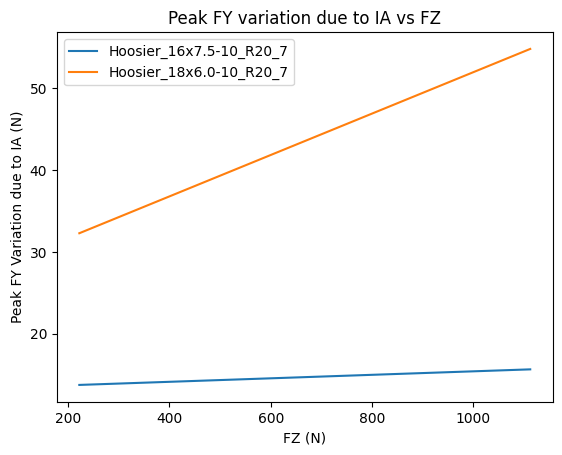

In [10]:
for i in range(len(normal_load_lst)):
    # plt.scatter(normal_load_lst[i], FY_diffs_lst[i])
    modified_FZ_lst = -1 * np.array(normal_load_lst[i])
    m, b = np.polyfit(modified_FZ_lst, FY_diffs_lst[i], 1)
    x_vals = np.linspace(min(modified_FZ_lst), max(modified_FZ_lst), 100)

    plt.plot(x_vals, m * x_vals + b)
    # plt.scatter(normal_load_lst[i], FY_diffs_lst[i])

plt.title("Peak FY variation due to IA vs FZ")
plt.xlabel("FZ (N)")
plt.ylabel("Peak FY Variation due to IA (N)")
plt.legend(names)